In [1]:
# Authentication for loading data from Google Drive
# Import packages
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
from os import path

In [2]:
# Authenticate User
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
auth_drive = GoogleDrive(gauth)

In [3]:
DRIVE_PATH = '/content/drive'
drive.mount(DRIVE_PATH)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
DATA_PATH = path.join(DRIVE_PATH, 'My Drive', 'LinkedIn_Articles', 'Datasets', 'Twitter_Real_or_Not')
OUTPUT_PATH = path.join(DRIVE_PATH, 'My Drive', 'LinkedIn_Articles', 'NLP & EDA')

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS

In [10]:
df_train = pd.read_csv(path.join(DATA_PATH, 'train.csv'), index_col='id')
df_test = pd.read_csv(path.join(DATA_PATH, 'test.csv'), index_col='id')

In [11]:
df_train

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [12]:
df_test

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...


In [15]:
# Check Nulls
print(df_train.keyword.isna().unique())
print(df_train.location.isna().unique())
print(df_train.text.isna().unique())
print(df_train.target.isna().unique())

print(df_test.keyword.isna().unique())
print(df_test.location.isna().unique())
print(df_test.text.isna().unique())

[ True False]
[ True False]
[False]
[False]
[ True False]
[ True False]
[False]


In [29]:
col_names=['keyword', 'location']

fig = go.Figure(data=[
    go.Bar(name='Train', x=col_names, y=[df_train.keyword.isna().sum(), df_train.location.isna().sum()]),
    go.Bar(name='Test', x=col_names, y=[df_test.keyword.isna().sum(), df_test.location.isna().sum()])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

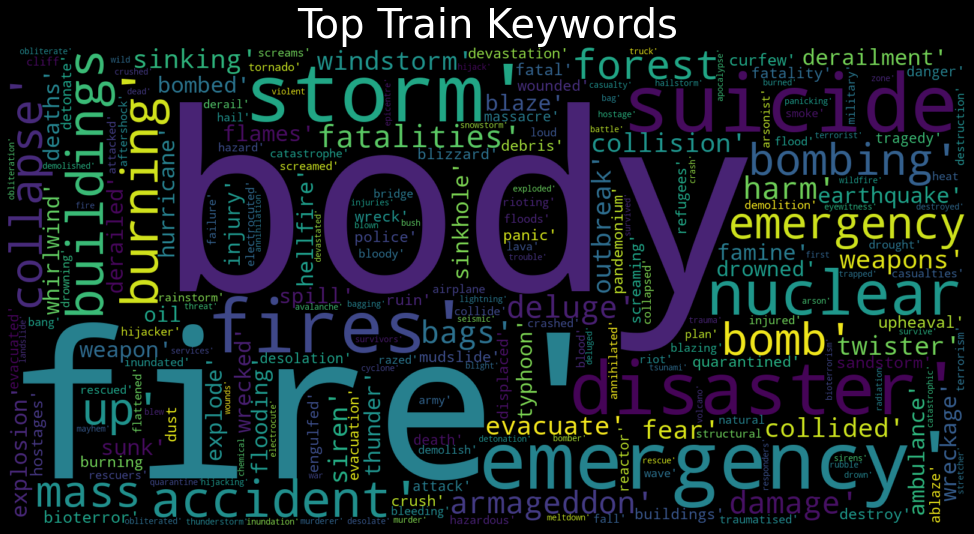

In [76]:
# Get the words
train_keyword = df_train['keyword'].dropna().replace({'%20': ' '}, regex=True).value_counts()

# Start Creating Word Cloud
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(train_keyword.index.to_list()))

# Plot
plt.figure(figsize=(20,10), facecolor='k')
plt.title('Top Train Keywords', fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

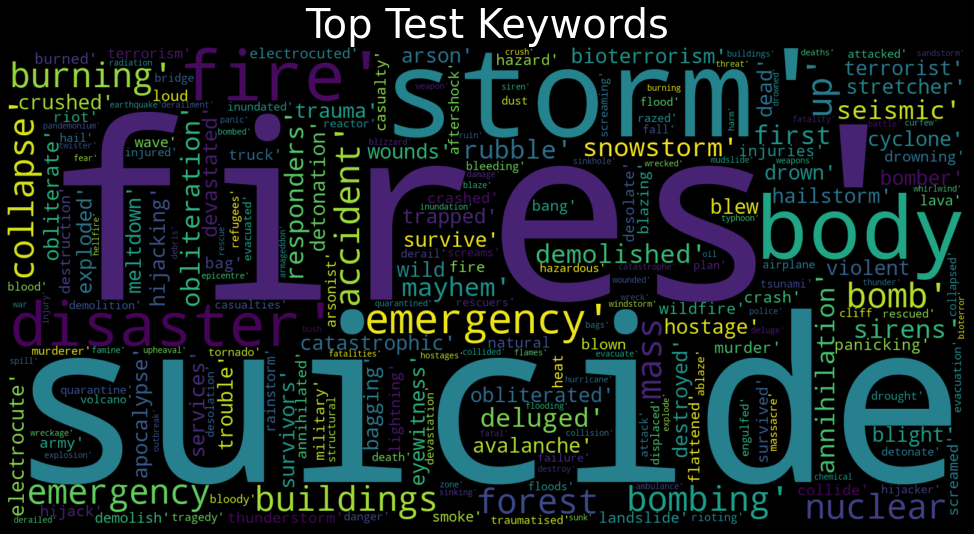

In [77]:
# Get the words
test_keyword = df_test['keyword'].dropna().replace({'%20': ' '}, regex=True).value_counts()

# Start Creating Word Cloud
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(test_keyword.index.to_list()))

# Plot
plt.figure(figsize=(20,10), facecolor='k')
plt.title('Top Test Keywords', fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [92]:
fig = px.bar(train_keyword, y=train_keyword.values, x=train_keyword.index, title='Top train keywords')
fig.show()

In [93]:
fig = px.bar(test_keyword, y=test_keyword.values, x=test_keyword.index, title='Top test keywords')
fig.show()

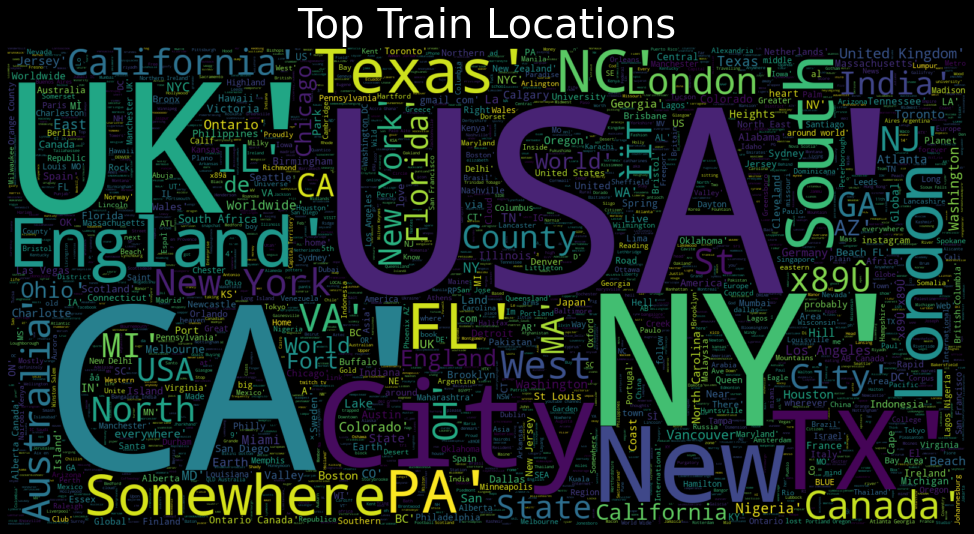

In [107]:
# Get the words
train_location = df_train['location'].dropna().value_counts()

# Start Creating Word Cloud
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(train_location.index.to_list()))

# Plot
plt.figure(figsize=(20,10), facecolor='k')
plt.title('Top Train Locations', fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [108]:
fig = px.bar(train_location, y=train_location.values, x=train_location.index, title='Top train locations')
fig.show()

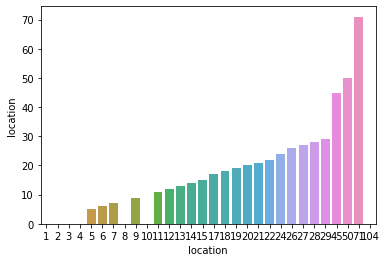

In [110]:
sns.barplot(x=train_location.index, y=train_location.values, data=train_location)

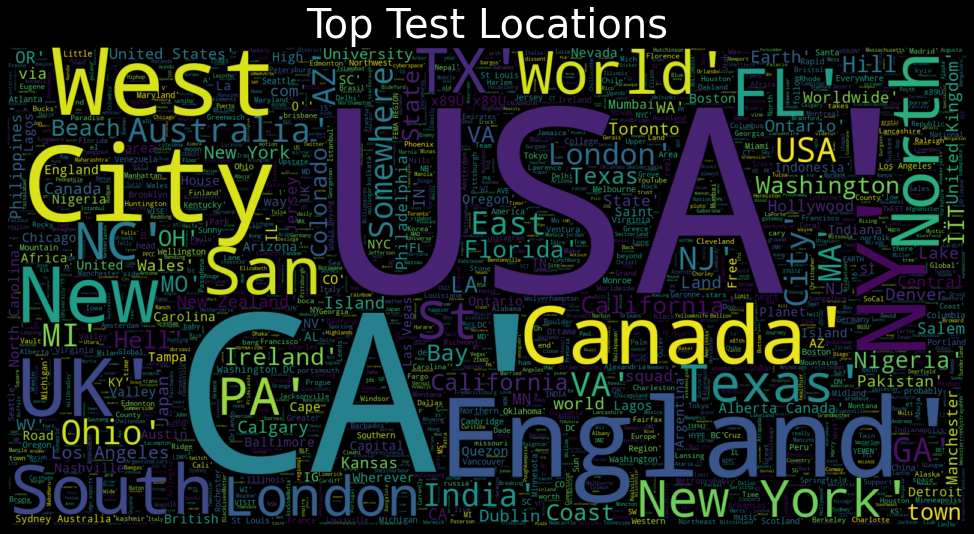

In [109]:
# Get the words
test_location = df_test['location'].dropna().value_counts()

# Start Creating Word Cloud
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
wc.generate(str(test_location.index.to_list()))

# Plot
plt.figure(figsize=(20,10), facecolor='k')
plt.title('Top Test Locations', fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [111]:
fig = px.bar(test_location, y=test_location.values, x=test_location.index, title='Top test locations')
fig.show()

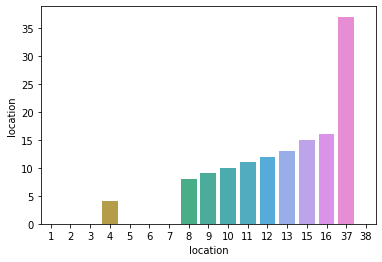

In [112]:
sns.barplot(x=test_location.index, y=test_location.values, data=test_location)